### presenters:

##### Maya Lagziel-316106509
##### Halel Shtern-212122147
##### Matanya Sido-20543868
##### Barak Elitzur-315671040


In [370]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'c:\users\barak\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\barak\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\barak\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\barak\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [371]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [372]:
url = 'https://raw.githubusercontent.com/barakelitzur/final_project/main/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv'
Crashes_df = pd.read_csv(url)
#Crashes_df

In [373]:
Crashes_df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

In [374]:
Crashes_df.columns =Crashes_df.columns.str.replace('#', 'number')

ראינו שיש סולמית ב"פלייט" ולכן שינינו אותה ל"נמבר" בכדי שלא יהיה סולמית

In [375]:
Crashes_df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight number             object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

In [376]:
Crashes_df['Date'] = pd.to_datetime(Crashes_df['Date'])
Crashes_df['year'] = pd.DatetimeIndex(Crashes_df['Date']).year
Crashes_df['month'] = pd.DatetimeIndex(Crashes_df['Date']).month

הפכנו את התאריך ל"דייט טיים" והוספנו עמודות של שנה וחודש

In [377]:
Crashes_df.isnull().sum().sort_values(ascending=False)

Flight number            3652
Time                     1510
Route                     774
cn/ln                     668
Registration              273
Fatalities Passangers     242
Fatalities Crew           241
Aboard Passangers         229
Aboard Crew               226
Summary                    64
Ground                     41
Aboard                     18
AC Type                    15
Operator                   10
Fatalities                  8
Location                    4
year                        0
Date                        0
month                       0
dtype: int64

בדקנו איזה עמודות יש לנו בהם "נאל" בכדי שנדע לתקן במידת הצורך

אין מה לתקן מספר טיסה כי זהו נתון שלא מעניין אותנו
אין מה לתקן שעת טיסה כי זהו נתון שלא מעניין אותנו כי לא ניתן לדעת באיזה שעה מדובר (לפי איזה אזור זמן)

In [378]:
Crashes_df['Fatalities Passangers'] = Crashes_df['Fatalities Passangers'].isnull()==False
Crashes_df['Fatalities Crew'] = Crashes_df['Fatalities Crew'].isnull()==False
Crashes_df['Fatalities'] = Crashes_df['Fatalities'].isnull()==False

מחקנו את השורות שלא כתוב לנו בהם מה כמות המתים כי לא נוכל להשתמש לנתח שורות אלו
ניתן לוותר על שורות אלו מכייון שביחס הם לא קריטיות ולא ניתן למלא אותם כי לא ניתן לשער כמו אנשים מתים

In [379]:
Crashes_df.isnull().sum().sort_values(ascending=False)

Flight number            3652
Time                     1510
Route                     774
cn/ln                     668
Registration              273
Aboard Passangers         229
Aboard Crew               226
Summary                    64
Ground                     41
Aboard                     18
AC Type                    15
Operator                   10
Location                    4
year                        0
Date                        0
Fatalities Crew             0
Fatalities Passangers       0
Fatalities                  0
month                       0
dtype: int64

In [380]:
#crash_num=Crashes_df['year']
Crashes_by_year_df=Crashes_df.groupby("year")[["Date"]].count().reset_index()
Crashes_by_year_df

,year,Date
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
104,2015,18
105,2016,23
106,2017,15
107,2018,16


<AxesSubplot:xlabel='year', ylabel='Date'>

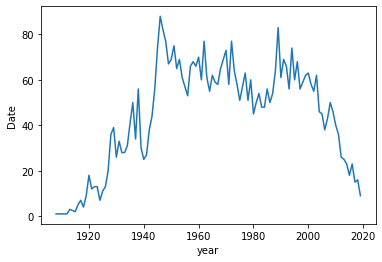

In [381]:
sns.lineplot(x='year', y='Date', data=Crashes_by_year_df)

<AxesSubplot:title={'center':'gross in relation to years'}, xlabel='year'>

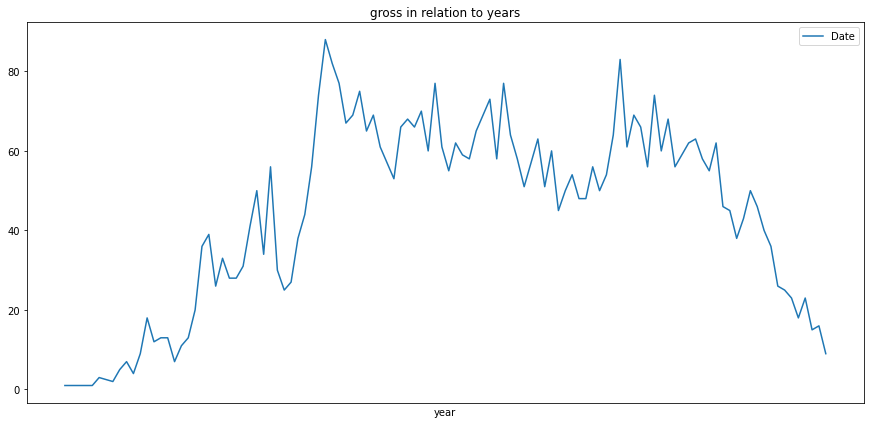

In [382]:
pd.pivot_table( Crashes_by_year_df,index = ['year'], values = ['Date']).plot(figsize=(15,7),xticks=(),title='gross in relation to years')


לסדר את האיור 
לחשוב אם רוצים סרגל של השנים למטה צבעים וכו

In [383]:
Crashes_by_ac=Crashes_df.groupby("AC Type")[["Fatalities"]].count().reset_index()
Crashes_by_ac
Crashes_by_ac.sort_values("Fatalities", ascending = False)

,AC Type,Fatalities
1123,Douglas DC-3,333
2384,de Havilland Canada DHC-6 Twin Otter 300,81
1036,Douglas C-47A,70
1026,Douglas C-47,64
1175,Douglas DC-4,38
...,...,...
885,Convair CV-340-62,1
884,Convair CV-340-59,1
882,Convair CV-340-32,1
880,Convair CV-300,1


בדקנו באיזה סוג מטוסים התרסק הכי הרבה לכן נמליץ לא להשתמש במטוסים אלו

במדיה ואין ברירה אלא להשתמש במטוס שיש לו הסטוריה של התרסקויות נעדיף לקחת את המטוסים בעלי מספר ההתרסקויות הנמוך ביותר
נבדוק מכל סוג מטוס שהתרסק באיזה מטוסים היה האחוז ניצולים הגדול ביותר

In [401]:
Crashes_by_ac=Crashes_df.groupby("AC Type")[["Fatalities"]]
Crashes_by_ac.head()


,Fatalities
0,True
1,True
2,True
3,True
4,True
...,...
4962,True
4963,True
4964,True
4965,True


In [385]:
Crashes_by_ac1=Crashes_df["Fatalities"]==1

#Crashes_by_ac1=Crashes_df.groupby("AC Type")[["Fatalities","Aboard"]].count().reset_index()
#Crashes_by_ac1["F_per"]=Crashes_by_ac1
